In [1]:
import numpy as np
import fur.path_assistant as path_assistant
Ex_3D = np.load(path_assistant.srw_Ex_3D_file_path)
Ey_3D = np.load(path_assistant.srw_Ey_3D_file_path)

In [2]:
from wiggler_radiation.transmission_data import transmission_function
from wigrad import Wiggler, WigglerRadiationSimulator
wiggler = Wiggler(K_peak=1.0)
x_max = 0.007257142857142857
y_max = x_max/np.sqrt(2)
n_x = 1024
n_y = int(n_x/np.sqrt(2))
n_l = 80
l_min = 0.85
l_max = 1.3
x_step = 2*x_max/(n_x-1)
y_step = 2*y_max/(n_y-1)
l_step = (l_max-l_min)/(n_l-1)
mesh = (np.linspace(-x_max, x_max, n_x),
        np.linspace(-y_max, y_max, n_y),
        np.linspace(l_min, l_max, n_l))
spectral_transmission = transmission_function(mesh[2])
wr_sim = WigglerRadiationSimulator(
    wiggler,
    mesh,
    gamma=100/0.511,
    harmonics=[1],
    aperture='ellipse',
    only_calc_sum_of_both_polarizations=False,  # if False, then both polarizations are calculated separately
    spectral_transmission=spectral_transmission
    )

In [3]:
elliptic_aperture = (wr_sim.x_3D**2/x_max**2+wr_sim.y_3D**2/y_max**2) < 1
Ex_3D = np.where(elliptic_aperture, Ex_3D, 0)
Ey_3D = np.where(elliptic_aperture, Ey_3D, 0)
Ex_3D = np.sqrt(spectral_transmission)[:, None, None]*Ex_3D
Ey_3D = np.sqrt(spectral_transmission)[:, None, None]*Ey_3D


In [4]:
wr_sim.set_photon_flux_3D(polarization='x', value=np.absolute(Ex_3D)**2)
wr_sim.set_photon_flux_3D(polarization='y', value=np.absolute(Ey_3D)**2)

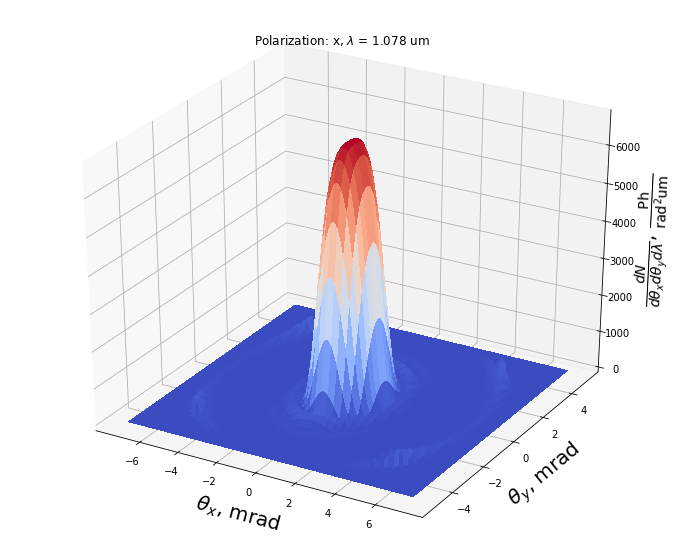

In [5]:
wr_sim.show_angular_distribution(polarization='x', index_of_lambda=int(n_l/2))

In [6]:
np.sum(np.absolute(Ex_3D)**2)*x_step*y_step*l_step

0.012457237610414038

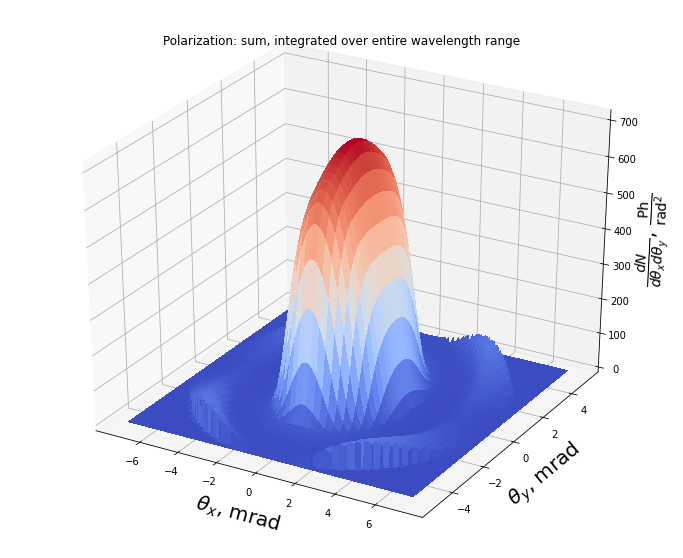

In [7]:
wr_sim.show_angular_distribution(polarization='sum')

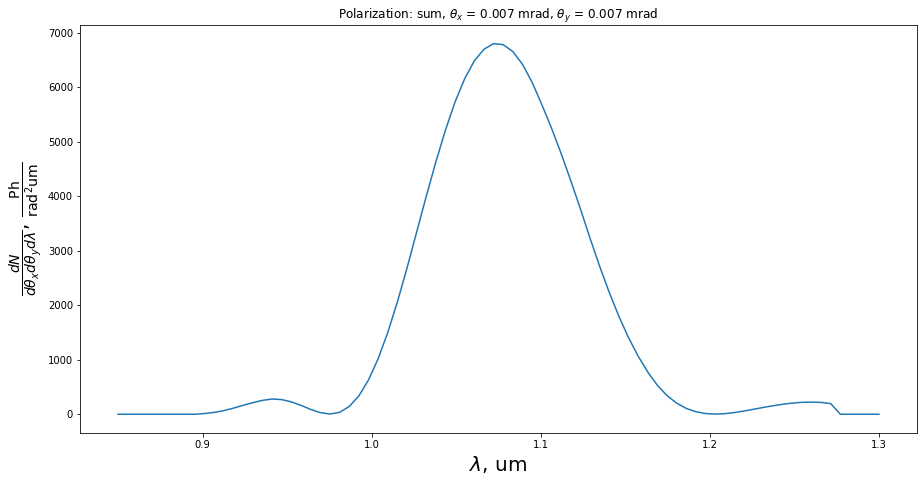

In [8]:
wr_sim.show_spectral_distribution(angular_indexes_tuple=(int(n_x/2),int(n_y/2)))

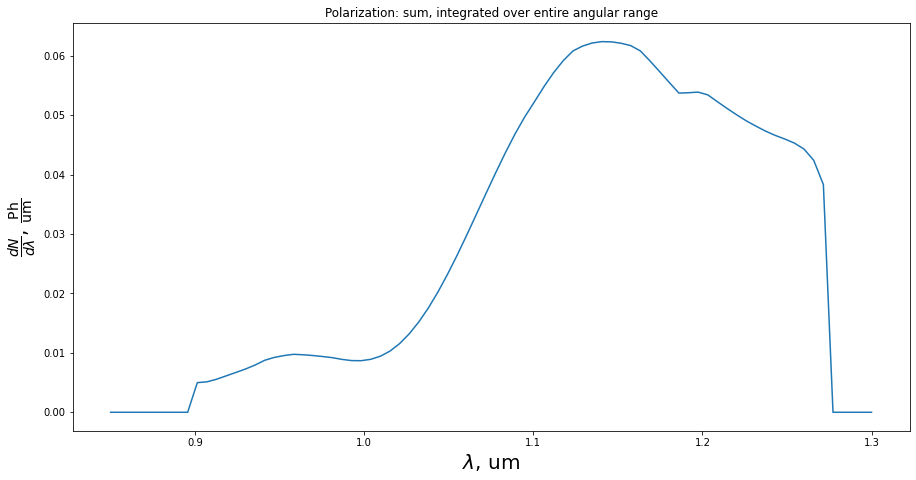

In [9]:
wr_sim.show_spectral_distribution(polarization='sum')

In [10]:
wr_sim.get_total_photon_flux(polarization='sum')

0.01280707564525824

In [11]:
wr_sim.get_total_photon_flux(polarization='x')

0.012457237610414023

In [12]:
wr_sim.get_total_photon_flux(polarization='y')

0.00034983803484421643